In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

## Extracting links of each book from Pages

In [4]:
for i in range(1,51):
    html_data= requests.get(f"https://books.toscrape.com/catalogue/page-{i}.html")
    with open(f"Scraped files/page{i}.html","w",encoding='utf-8') as f:
        f.write(html_data.text)

In [85]:
books=[]
for i in range(1,51):
    with open(f"Scraped files/page{i}.html","r",encoding='utf-8') as f:
        file_content=f.read()
        soup=BeautifulSoup(file_content,"html.parser")
        articles=soup.select("article.product_pod")
        for article in articles:
            title=article.find("h3").find("a")["title"]
            price=article.select_one("p.price_color").text.split("£")[1]
            rating=article.select_one("p.star-rating")["class"][1]
            availability=article.find("p",class_="instock availability").text.split("\n")[3][8:]
            link= article.select_one("h3 a[href]").get("href")
            books.append([title,price,rating,availability,link])

In [86]:
df=pd.DataFrame(books,columns=["Book","Price","Rating","Availability","Buy Link"])
df.to_csv("Basic Data.csv")

In [5]:
df

,Book,Price,Rating,Availability,Buy Link
0,A Light in the Attic,51.77,Three,In stock,a-light-in-the-attic_1000/index.html
1,Tipping the Velvet,53.74,One,In stock,tipping-the-velvet_999/index.html
2,Soumission,50.10,One,In stock,soumission_998/index.html
3,Sharp Objects,47.82,Four,In stock,sharp-objects_997/index.html
4,Sapiens: A Brief History of Humankind,54.23,Five,In stock,sapiens-a-brief-history-of-humankind_996/index...
...,...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,55.53,One,In stock,alice-in-wonderland-alices-adventures-in-wonde...
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,Four,In stock,ajin-demi-human-volume-1-ajin-demi-human-1_4/i...
997,A Spy's Devotion (The Regency Spies of London #1),16.97,Five,In stock,a-spys-devotion-the-regency-spies-of-london-1_...
998,1st to Die (Women's Murder Club #1),53.98,One,In stock,1st-to-die-womens-murder-club-1_2/index.html


## Download webpage and Scrape each book

In [8]:
count=516
for i in df["Buy Link"]:
    
    #print(f"https://books.toscrape.com/catalogue/{i}")
    html_data= requests.get(f"https://books.toscrape.com/catalogue/{i}")
    with open(f"Scraped Books/Book{count}.html","w",encoding='utf-8') as f:
        f.write(html_data.text)
    count+=1

In [66]:
data=[]
for i in range(0,1000):
    with open(f"Scraped Books/Book{i}.html",encoding='utf-8') as f:
        book_content=f.read()
        soup=BeautifulSoup(book_content,"html.parser")
        gerne=soup.select_one("ul.breadcrumb li:nth-of-type(3) a").text
        articles=soup.select("article.product_page")
        for article in articles:
            title=article.find("h1").text
            price=float(article.select_one("p.price_color").text.strip()[2:7])
            stock_available=int(article.find("p",class_="instock availability").text.strip()[10:12])
            rating=article.select_one("p.star-rating")["class"][1]
        data.append([title,gerne,price,rating,stock_available])

In [92]:
data_frame=pd.DataFrame(data,columns=['Book Title','Genre','Price £','Rating','Stock Available'])
data_frame['Rating']=data_frame['Rating'].map({'One':1,'Two':2,'Three':3,'Four':4,'Five':5})

In [88]:
data_frame.to_csv("Data.csv")

In [93]:
data_frame

,Book Title,Genre,Price £,Rating,Stock Available
0,A Light in the Attic,Poetry,51.77,3,22
1,Tipping the Velvet,Historical Fiction,53.74,1,20
2,Soumission,Fiction,50.10,1,20
3,Sharp Objects,Mystery,47.82,4,20
4,Sapiens: A Brief History of Humankind,History,54.23,5,20
...,...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,Classics,55.53,1,1
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",Sequential Art,57.06,4,1
997,A Spy's Devotion (The Regency Spies of London #1),Historical Fiction,16.97,5,1
998,1st to Die (Women's Murder Club #1),Mystery,53.98,1,1


## Exploratory Data Analysis

In [3]:
data_frame=pd.read_csv("Data.csv")

In [10]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1000 non-null   int64  
 1   Book Title       1000 non-null   object 
 2   Genre            1000 non-null   object 
 3   Price £          1000 non-null   float64
 4   Rating           1000 non-null   int64  
 5   Stock Available  1000 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 47.0+ KB


C:\Users\saket\AppData\Local\Temp\ipykernel_14300\1722824157.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Genre',data=data_frame,order=data_frame['Genre'].value_counts().index,palette='viridis',legend=False)


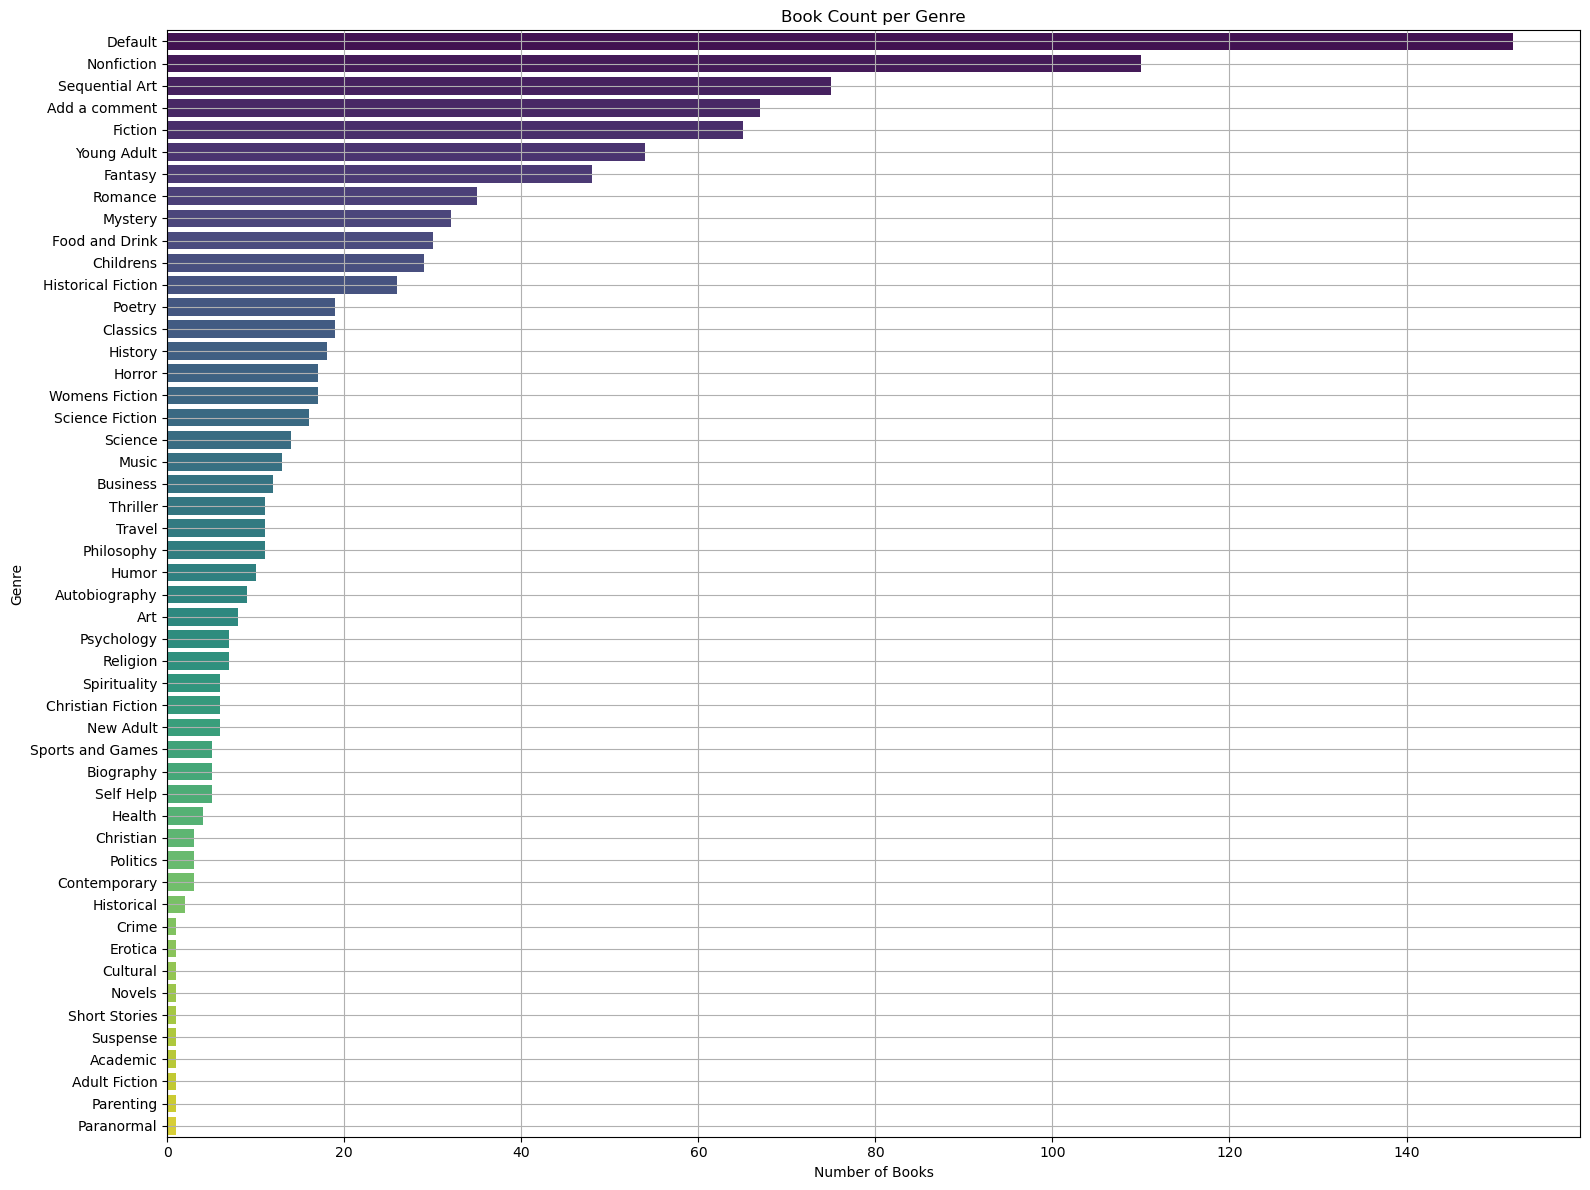

In [9]:
plt.figure(figsize=(16, 12))
sns.countplot(y='Genre',data=data_frame,order=data_frame['Genre'].value_counts().index,palette='viridis',legend=False)
plt.xlabel('Number of Books')
plt.ylabel('Genre')
plt.title('Book Count per Genre')
plt.tight_layout()
plt.grid()
plt.show()

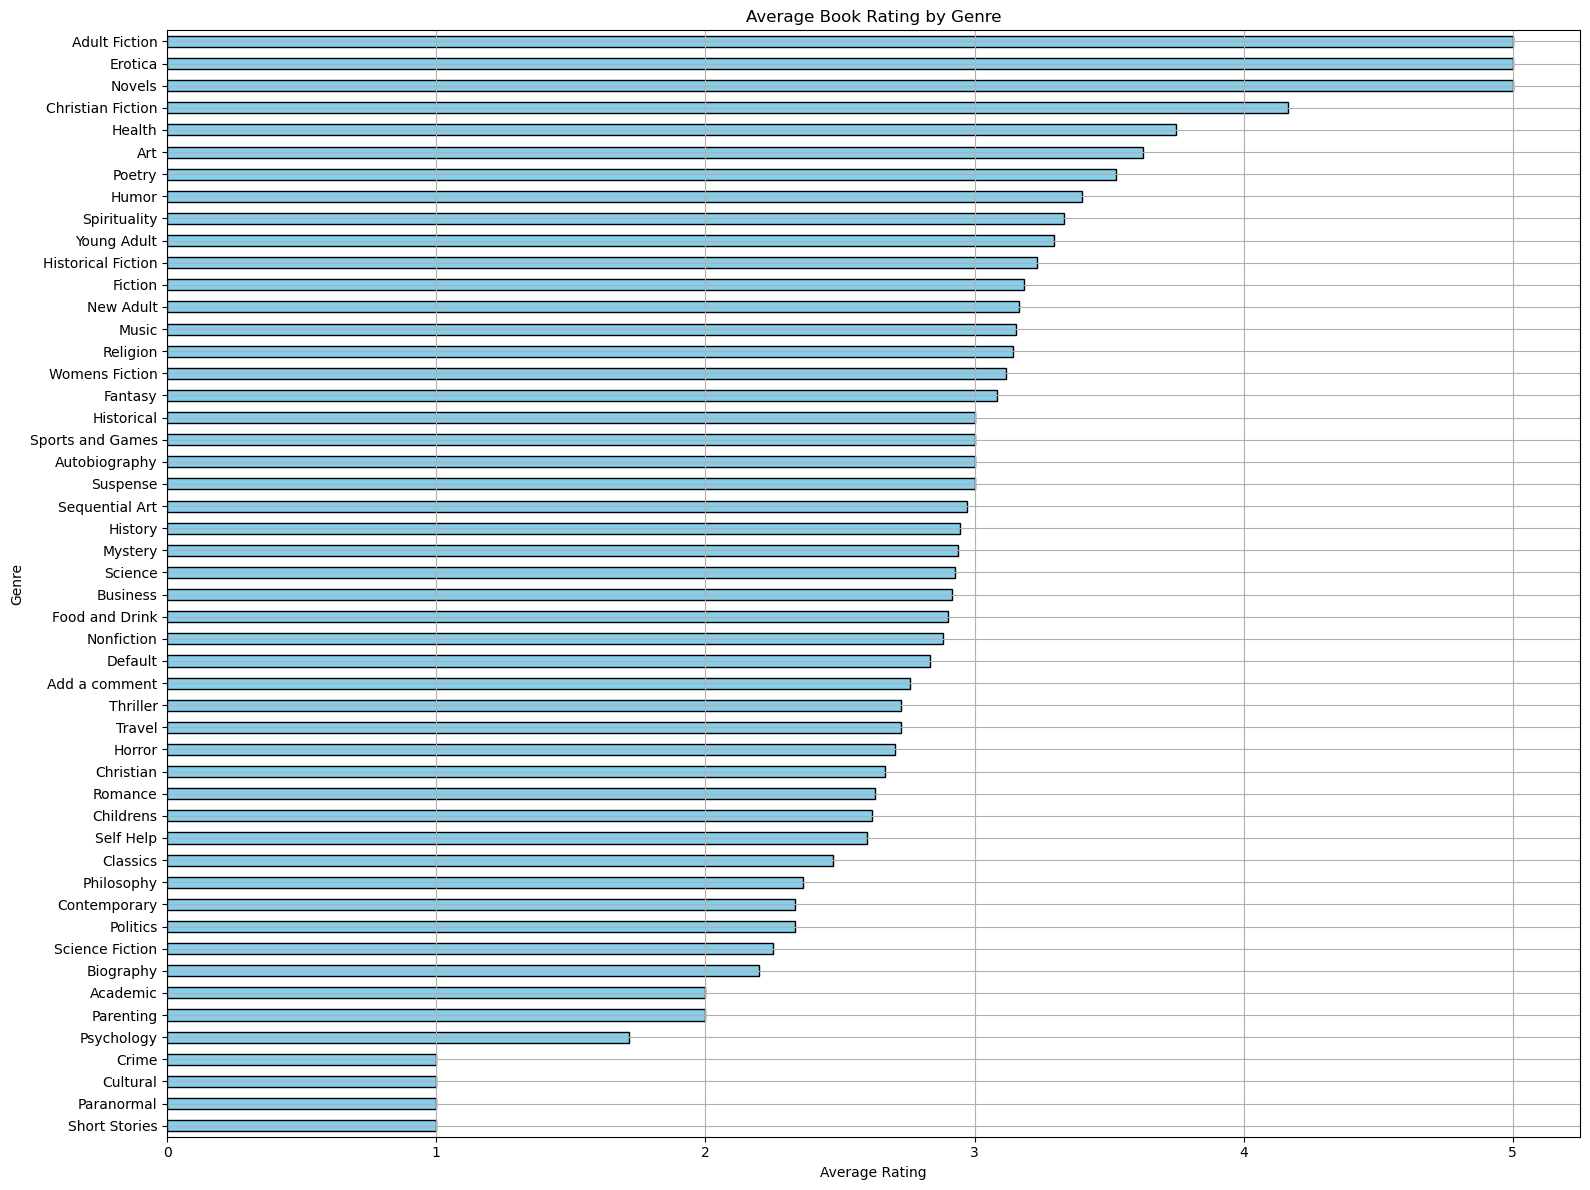

In [11]:
mean_ratings = data_frame.groupby('Genre')['Rating'].mean().sort_values()
plt.figure(figsize=(16,12))
mean_ratings.plot(kind='barh',color='skyblue',edgecolor='black')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.title('Average Book Rating by Genre')
plt.tight_layout()
plt.grid()
plt.show()

Text(0.5, 1.0, 'Comparison between price and rating')

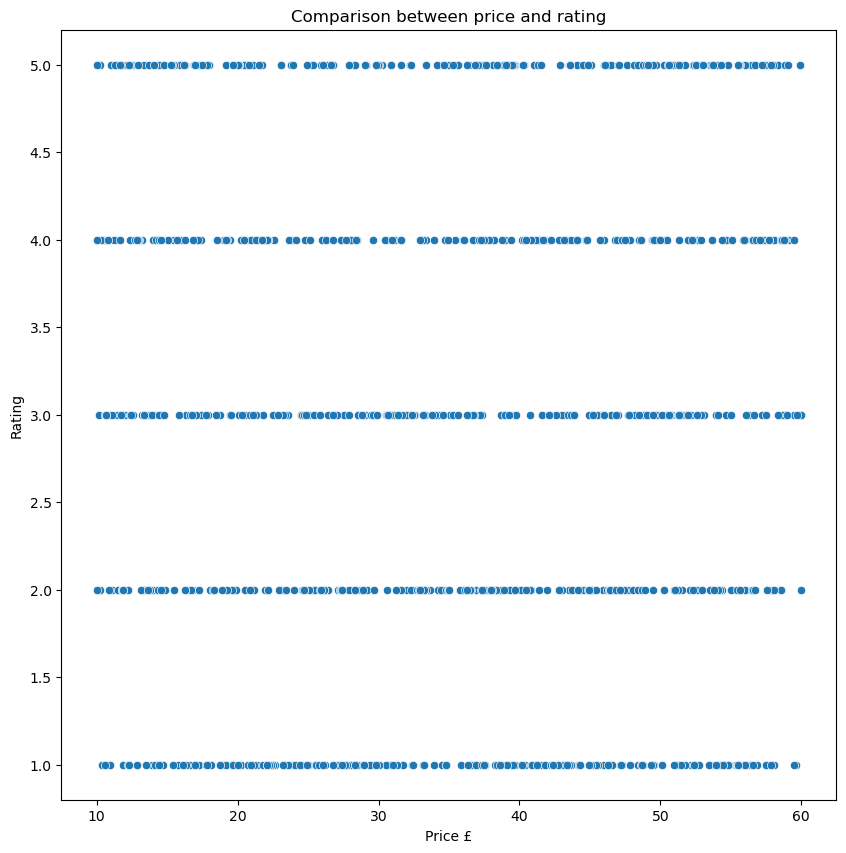

In [7]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Price £',y='Rating',data=data_frame)
plt.title("Comparison between price and rating")